$$
Traitement \ d'images \\
Segmentation
$$

**Travail réalisé par:**



*   Turki Seddik



### Importer les librairies et bibliothéques nécessaires

In [ ]:
import numpy as np
import pandas as pd

from skimage.io import imread, imshow
from skimage.transform import resize
from PIL import Image, ImageDraw
import cv2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

$$$$

## I.1 Segmentation par seuillage

In [ ]:
from skimage.filters import threshold_otsu, threshold_multiotsu

**Lire et afficher l'image**

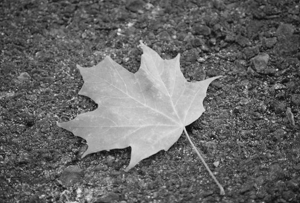

In [ ]:
img = Image.open('06.png').convert('L')
img

**Histogramme**

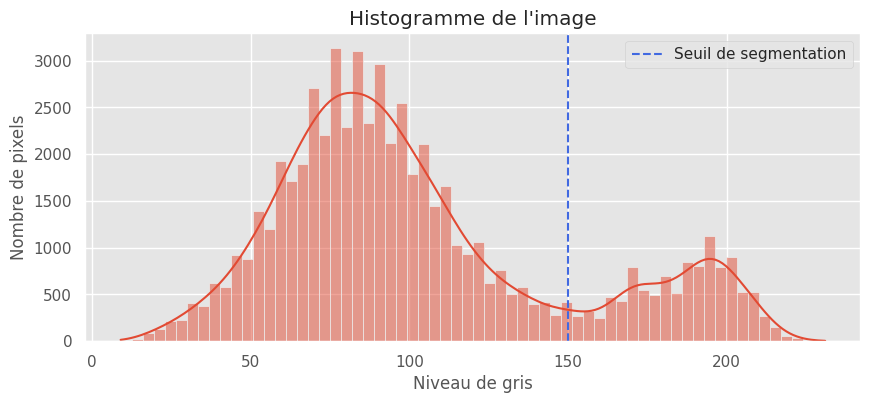

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(np.array(img).flatten(), kde=True, bins=64)
seuil = 150
plt.axvline(x=seuil, color='royalblue', linestyle='--', label='Seuil de segmentation')
plt.legend()
plt.xlabel('Niveau de gris')
plt.ylabel('Nombre de pixels')
plt.title('Histogramme de l\'image')
plt.show()

**Segmentation manuelle de l'image**

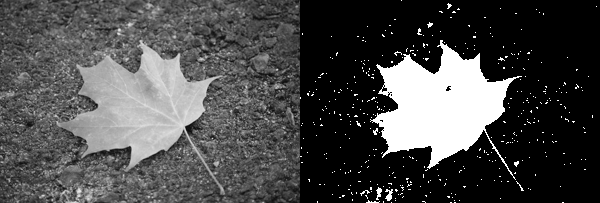

In [ ]:
seuil_manuel = 150  # choix du seuil
seg_img = img.point(lambda x: 255 if x > seuil_manuel else 0)
Image.fromarray(np.concatenate([img,seg_img],axis=1))

**Segmentation Interactive avec un Slider**

In [ ]:
from ipywidgets import interact, IntSlider
def update(seuil):
    plt.figure(figsize=(5,5))
    image_segmentee = img.point(lambda x: 255 if x > seuil else 0)
    plt.imshow(image_segmentee, cmap='gray')
    plt.axis('off')
    plt.show()

_ = interact(update, seuil=IntSlider(min=0, max=255, step=1, value=150))

interactive(children=(IntSlider(value=150, description='seuil', max=255), Output()), _dom_classes=('widget-int…

**Seuillage global automatique**

In [ ]:
hist, bins = np.histogram(np.array(img).flatten(), bins=256, range=[0,256])
hist_norm = hist / np.sum(hist)

T0 = 50
T = T0
epsilon = 0.1

while True:
    G1 = hist_norm[:T]
    G2 = hist_norm[T:]
    m1 = np.sum(G1 * np.arange(T)) / np.sum(G1)
    m2 = np.sum(G2 * np.arange(T, 256)) / np.sum(G2)
    nouveau_T = int((m1 + m2) / 2)
    if abs(nouveau_T - T) < epsilon:
        break
    else:
        T = nouveau_T
print(f'Le seuil de segmentation trouvé à l\'aide de cette méthode est:\n{T}')

Le seuil de segmentation trouvé à l'aide de cette méthode est:
127


**Seuillage d’Otsu**

Le seuil d'Otsu est: 129


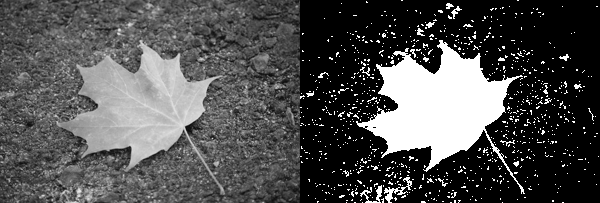

In [ ]:
seuil_otsu = threshold_otsu(np.array(img))
img_otsu = img.point(lambda x: 255 if x > seuil_otsu else 0)
print(f'Le seuil d\'Otsu est: {seuil_otsu}')
Image.fromarray(np.concatenate([img,img_otsu],axis=1))

**Seullage Multi Otsu**

Les seuils trouvés sont: [ 84 144]


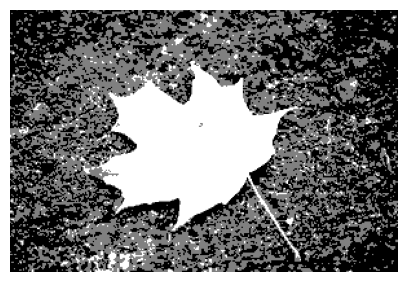

In [ ]:
seuils_multiotsu = threshold_multiotsu(np.array(img))
print(f'Les seuils trouvés sont: {seuils_multiotsu}')
plt.figure(figsize=(5,5))
plt.imshow(np.digitize(img, bins=seuils_multiotsu), cmap='gray')
plt.axis('off')
plt.show()

**Interprétations**

> Le seuillage manuel peut aboutir à des erreurs, et peut produire des segmentations moins précises. En revanche, la méthode d'Otsu produit des résultats plus cohérents et plus fiables, car elle est basée sur des critères statistiques et prend en compte la distribution globale des niveaux de gris dans l'image

> Avec cette image la segmentation obtenue avec la méthode d'Otsu était plus nette et mieux définie que celle obtenue avec le seuillage manuel. Les zones d'intérêt étaient mieux délimitées

> De plus, on a testé la méthode multiotsu, utilisée dans des scénarios où l'image présente des niveaux de gris multiples ou des régions d'intérêts distinctes. Cette approche a fournit une segmentation plus précise en adaptant le seuil à différents niveaux de gris présents dans l'image

$$$$